In [3]:
import numpy as np

def powerLaw(y, x):
    """
    'When the frequency of an event varies as power of some attribute of that
    event the frequency is said to follow a power law.' (wikipedia)
    This is represented by the following equation, where c and alpha are
    constants:
    y = c . x ^ alpha
    Args
    --------
    y: array with frequency of events >0
    x: numpy array with attribute of events >0
    Output
    --------
    (c, alpha)
    c: the maximum frequency of any event
    alpha: defined by (Newman, 2005 for details):
        alpha = 1 + n * sum(ln( xi / xmin )) ^ -1
    """
    c = 0
    alpha = .0

    if len(y) and len(y)==len(x):
        c = max(y)
        xmin = float(min(x))
        alpha = 1 + len(x) * pow(sum(np.log(x/xmin)),-1)

    return (c, alpha)


import matplotlib.pyplot as plt
%matplotlib inline

def plotPowerLaws(y, x, c=[], alpha=[]):
    """
    Plots the relationship between x and y and a fitted power law on LogLog
    scale.
    Args
    --------
    y: array with frequency of events >0
    x: array with attribute of events >0
    c: array of cs for various power laws
    alpha: array of alphas for various power laws
    """
    plt.figure()
    plt.loglog()
    plt.plot(x,
             y,
             'r+')
    for _c, _alpha in zip(c,alpha):
        plt.plot( (1, max(x)),
                  (_c, _c * pow(max(x), _alpha)),
                  label='~x^%.2f' % _alpha)
        plt.legend()
    plt.show()

According to Zipfs law 2.85 should be close to 1.


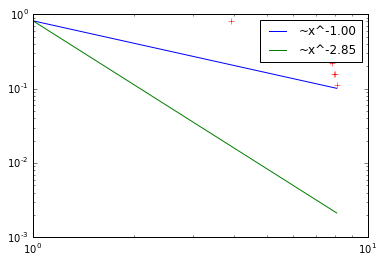

In [26]:
"""Checking Zipfs law, where the frequency and rank of a word follow a
specific power law, using the nltk genesis text in english.
"""
from collections import defaultdict
import numpy as np
from nltk.corpus import genesis

# x = np.array([7.64385619,8.64385619,9.22881869,9.64385619,9.965784285,10.22881869,10.45121111,10.64385619,10.81378119,10.96578428,11.10328781,11.22881869,11.34429591,11.45121111,11.55074679,11.64385619,11.68825031,11.73131903,11.77313921,11.81378119,11.85330956,11.8917837,11.92925841,11.96578428,12.00140819,12.03617361])
# y = np.array([0.92675377, 0.716336658, 0.598094472, 0.502314397, 0.4392717, 0.40266264, 0.371472252, 0.329485408, 0.291551529, 0.272605033, 0.247746201, 0.222222222,0.176106945, 0.222222222, 0.184551561, 0.166666667, 0, 0.1111111110, 0.111111111, 0.088053472, 0.111111111, 0.088053472, 0.055555556, 0, 0.055555556, 0])

y = np.array([0.817042544,0.677349601,0.604080228,0.543043726,0.507752853,0.46552102,0.442863531,0.418842156,0.364143825,0.33457599,0.311928325,0.287218056,0.254720139,0.235995973,0.222222222,0.155964162,0.155964162,0.111111111])
x = np.array([3.906890596,4.906890596,5.491853096,5.906890596,6.22881869,6.491853096,6.714245518,6.906890596,7.076815597,7.22881869,7.366322214,7.491853096,7.607330314,7.714245518,7.813781191,7.906890596,7.994353437,8.076815597])

c, alpha = powerLaw(y, x)
print 'According to Zipfs law %.2f should be close to 1.' % alpha
plotPowerLaws(y, x, [c,c], [-1,-alpha])

According to Zipfs law 3.81 should be close to 1.


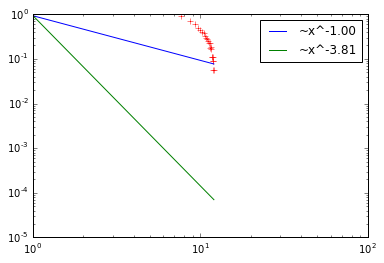

In [31]:
x = np.array([7.64385619,8.64385619,9.22881869,9.64385619,9.965784285,10.22881869,10.45121111,10.64385619,10.81378119,10.96578428,11.10328781,11.22881869,11.34429591,11.45121111,11.55074679,11.64385619,11.68825031,11.73131903,11.77313921,11.81378119,11.85330956,11.8917837,11.92925841,11.96578428,12.00140819,12.03617361])
y = np.array([0.92675377, 0.716336658, 0.598094472, 0.502314397, 0.4392717, 0.40266264, 0.371472252, 0.329485408, 0.291551529, 0.272605033, 0.247746201, 0.222222222,0.176106945, 0.222222222, 0.184551561, 0.166666667, 0, 0.1111111110, 0.111111111, 0.088053472, 0.111111111, 0.088053472, 0.055555556, 0, 0.055555556, 0])

c, alpha = powerLaw(y, x)
print 'According to Zipfs law %.2f should be close to 1.' % alpha
plotPowerLaws(y, x, [c,c], [-1,-alpha])

In [27]:
import csv

with open('degrees.csv') as csvfile:
    degrees = map(lambda x: int(x[0]), list(csv.reader(csvfile)))

with open('degrees_filtered.csv') as csvfile:
    degrees_filtered = map(lambda x: int(x[0]), list(csv.reader(csvfile)))

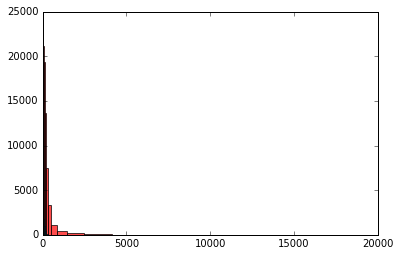

In [28]:
(n_init, bins_init, _) = plt.hist(degrees, bins=np.logspace(0,9, num=20, base=3.0), color='r',alpha=0.7, label="Learned graph")
(n_filtered, bins_filtered, _) = plt.hist(degrees_filtered, bins=np.logspace(0,9, num=20, base=3.0), alpha=0.7, color='#2b8cbe', label="Initial graph")

According to Zipfs law 1.21 should be close to 1.


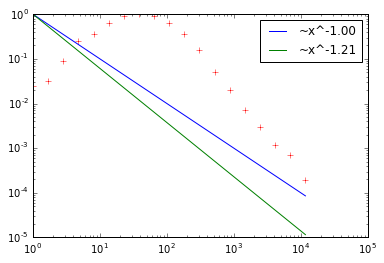

In [29]:
c, alpha = powerLaw(n_init / max(n_init), bins_init[:-1])
print 'According to Zipfs law %.2f should be close to 1.' % alpha
plotPowerLaws(n_init / max(n_init), bins_init[:-1], [c,c], [-1,-alpha])

According to Zipfs law 1.21 should be close to 1.


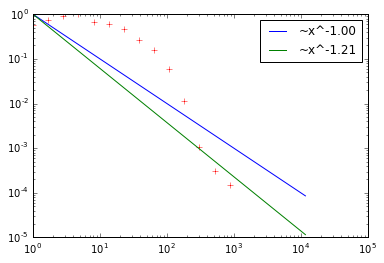

In [30]:
c, alpha = powerLaw(n_filtered / max(n_filtered), bins_filtered[:-1])
print 'According to Zipfs law %.2f should be close to 1.' % alpha
plotPowerLaws(n_filtered / max(n_filtered), bins_filtered[:-1], [c,c], [-1,-alpha])